# EDA on Yelp User Dataset 

In this notebook, we will be performing some EDA on data of Yelp users made available to us. 

## Data Dictionary 



**Descriptions**: User data including the user's friend mapping and all the metadata associated with the user.

**user_id**: "Ha3iJu77CxlrFm-vQRs_8g",
   string, 22 character unique user id, maps to the user in user.json
    
**name**: "Sebastien",
   string, the user's first name
    
**review_count**: 56,
   integer, the number of reviews they've written
    
**yelping_since**: "2011-01-01",
   string, when the user joined Yelp, formatted like YYYY-MM-DD
    
**friends**: [
        "wqoXYLWmpkEH0YvTmHBsJQ",
        "KUXLLiJGrjtSsapmxmpvTA",
        "6e9rJKQC3n0RSKyHLViL-Q"
    ],
   array of strings, an array of the user's friend as user_ids
   
**useful**: 21,
   integer, number of useful votes sent by the user
    
**funny**: 88,
   integer, number of funny votes sent by the user
    
**cool**: 15,
   integer, number of cool votes sent by the user
    
**fans**: 1032,
   integer, number of fans the user has
    
**elite**: [
        2012,
        2013
    ],
   array of integers, the years the user was elite
    
**average_stars**: 4.31,
   float, average rating of all reviews
    
**compliment_hot**: 339,
   integer, number of hot compliments received by the user
    
**compliment_more**: 668,
   integer, number of more compliments received by the user
    
**compliment_profile**: 42,
   integer, number of profile compliments received by the user
    
**compliment_cute**: 62,
   integer, number of cute compliments received by the user
    
**compliment_list**: 37,
   integer, number of list compliments received by the user
    
**compliment_note**: 356,
   integer, number of note compliments received by the user
    
**compliment_plain**: 68,
   integer, number of plain compliments received by the user
    
**compliment_cool**: 91,
   integer, number of cool compliments received by the user
    
**compliment_funny**: 99,
   integer, number of funny compliments received by the user
    
**compliment_writer**: 95,
   integer, number of writer compliments received by the user
    
**compliment_photos**: 50
   integer, number of photo compliments received by the user
    


**Note on Yelp Elite Squad**

Elite-worthiness is based on a number of things, including well-written reviews, high quality tips, a detailed personal profile, an active voting and complimenting record, and a history of playing well with others. Members of the Elite Squad are designated by a colorful Elite badge on their account profile.

## Navigating the Data

In [ ]:
# imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import datetime as dt
%matplotlib inline 
import warnings
warnings.simplefilter(action='ignore')

In [6]:
# Loading in the data 
users = pd.read_csv("/home/schubert/DSI/capstone_project/data/yelp_user.csv")

In [13]:
users.shape

(1326100, 22)

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
user_id               1326100 non-null object
name                  1325603 non-null object
review_count          1326100 non-null int64
yelping_since         1326100 non-null object
friends               1326100 non-null object
useful                1326100 non-null int64
funny                 1326100 non-null int64
cool                  1326100 non-null int64
fans                  1326100 non-null int64
elite                 1326100 non-null object
average_stars         1326100 non-null float64
compliment_hot        1326100 non-null int64
compliment_more       1326100 non-null int64
compliment_profile    1326100 non-null int64
compliment_cute       1326100 non-null int64
compliment_list       1326100 non-null int64
compliment_note       1326100 non-null int64
compliment_plain      1326100 non-null int64
compliment_cool       1326100 non-null int64
compliment_funny      132

In [9]:
users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [10]:
users.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful',
       'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [11]:
users["elite"].unique()

array(['None', '2009', '2014, 2016, 2013, 2015, 2010, 2012, 2011', ...,
       '2011, 2012, 2016, 2014, 2017, 2013, 2015',
       '2009, 2012, 2010, 2008, 2013, 2011, 2014',
       '2008, 2012, 2013, 2010, 2011, 2009'], dtype=object)

## Closer look at Review Count

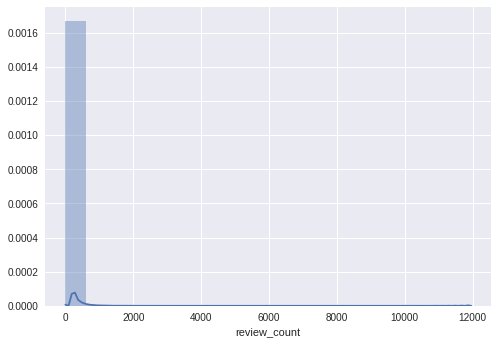

In [80]:
# distribution of review count in our dataset 
sns.set(style="darkgrid")
ax = sns.distplot(users["review_count"], bins=20)

This isn't very helpful, let's play with bin size, grouping users with review count over 60 together

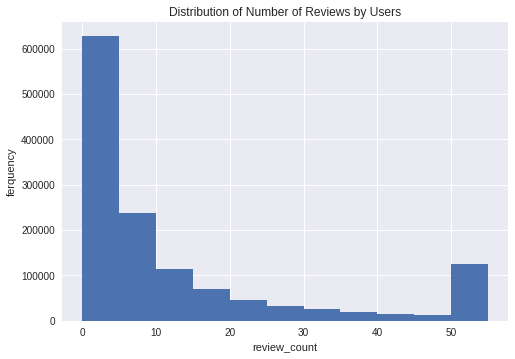

In [70]:
bins = np.arange(0,60,5)
plt.hist(np.clip(users["review_count"], bins[0], bins[-1]), bins=bins);
plt.xlabel("review_count")
plt.ylabel("ferquency")
plt.title("Distribution of Number of Reviews by Users");

Let's get some summary statistics to get a more granular view of what is going on. Since we may be doing this quite often, let's make a function.

In [74]:
def summary_stats(data, column):
    '''
    Takes in designated dataframe and column and returns 
    summary statistics 
    ----
    Paramaters:
    Data: Chosen dataframe
    Column: column of choice
    ---
    '''
    # Calculates summary stats
    column_median = statistics.median(data[column])
    column_mean = statistics.mean(data[column])
    column_mode = statistics.mode(data[column])
    column_stdev = statistics.stdev(data[column], xbar=None)
    column_variance = statistics.variance(data[column], xbar=None)
    
    # Prints summary stats 
    print("The median of ", column, "is: ", column_median)
    print("The mean of ", column, "is: ", column_mean)
    print("The mode of ", column, "is: ", column_mode)
    print("The standard deviation of ", column, "is: ", column_stdev)
    print("The variance of ", column, "is: ", column_variance)

In [106]:
summary_stats(users, "review_count")

The median of  review_count is:  5.0
The mean of  review_count is:  23.117172913053313
The mode of  review_count is:  1
The standard deviation of  review_count is:  79.09808239226022
The variance of  review_count is:  6256.506638132787


In [103]:
users["review_count"].describe()

count    1.326100e+06
mean     2.311717e+01
std      7.909808e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.500000e+01
max      1.195400e+04
Name: review_count, dtype: float64

https://docs.python.org/3/library/statistics.html

### Average Stars

In [134]:
summary_stats(users, "average_stars")

The median of  average_stars is:  3.9
The mean of  average_stars is:  3.7108406832063947
The mode of  average_stars is:  5.0
The standard deviation of  average_stars is:  1.120720784950174
The variance of  average_stars is:  1.256015077819334


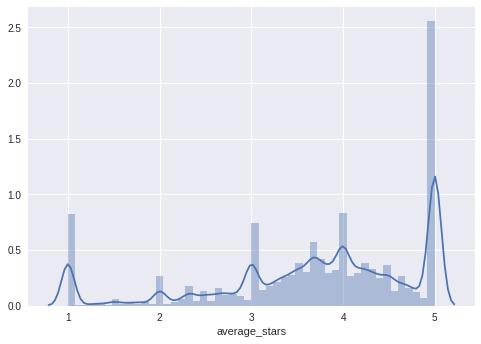

In [68]:
sns.set(style="darkgrid")
ax = sns.distplot(users["average_stars"])

We can glean a few things from this graph: 

    1) The reason we have "spikes" at 1, 2, 3, 4, and 5 is because most users leave 1 review
    2) Of those who leave multiple reviews, most of their average scores lie between 3 and 5 stars, with a greater portion of those being between 3.5 and 4.5 stars
    
Recommendation for Yelp: 
Use a weighted average so that reviewers with very few reviews get reduced weighting. This can be tied to those who have achieved Elite Status that year. 

In [49]:
users[users["average_stars"] == 5.0]

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
6,JaTVvKsBl0bHHJEpESn4pQ,Peter,2,2013-03-23,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
9,H54pA7YHfjl8IjhHAfdXJA,Chad,3,2010-06-25,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
10,WRae-wZkpRoxMrgJdqwyxg,Mike,1,2017-11-29,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
15,a_gKYQ5YMg39FHNYJLWRHg,Joselyn,1,2017-11-07,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
20,eMBV7FugCJq7FIvGhARo2Q,Jack,1,2012-09-22,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
23,8wxTBgvIkCgEZrNfTc1eWQ,mike,4,2011-03-11,None,0,0,1,0,None,...,0,0,0,0,0,0,0,0,0,0
24,moJE85Sfg7Itd3-iIvduQQ,Alan,1,2013-07-10,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
26,y3ONpOBwpnXb57QNlWUhWQ,Cynthia,1,2016-12-06,None,1,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
27,PASVfluTGQC5vpjdl-jinw,Brian,1,2014-11-14,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
28,bOJZW_hvGkVEIQVwhyqSuw,Justin,2,2013-12-07,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0


Next Steps:
- Turn `yelping_since` to datetime object
- Create month, date and year features

In [85]:
users["yelping_since_dt"] = pd.to_datetime(users["yelping_since"])

In [86]:
users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,yelping_since_dt
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,79,2013-09-24
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,2017-03-02
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,2015-03-13
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,2016-09-08
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,1,0,0,2012-07-16


Features to create: 
- year
- month 
- date
- day of week
- ttl months yelping
- ttl years yelping

In [89]:
users = users.set_index("yelping_since_dt")

In [100]:
users["yelping_since_yr"] = users.index.to_period('Y')
users["yelping_since_m"] = users.index.month
users["yelping_since_d"] = users.index.day
users["yelping_since_wkd"] = users.index.weekday

In [101]:
users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,yelping_since_yr,yelping_since_m,yelping_since_d
yelping_since_dt,,,,,,,,,,,,,,,,,,,,,
2013-09-24,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,79,2013,9,24
2017-03-02,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,2017,3,2
2015-03-13,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,2015,3,13
2016-09-08,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,2016,9,8
2012-07-16,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,1,0,0,2012,7,16


In [ ]:
sns.countplot(users["yelping_since_yr"], color = 'b').set_title('Year Users Joined',fontsize=30)
# If I want the years ordered, goignt o have to use AWS because trying to locally crashed computer

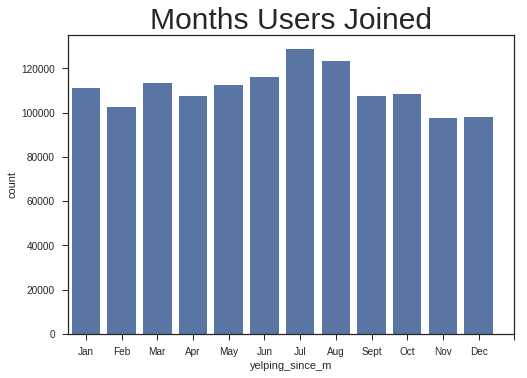

In [133]:
sns.countplot(users["yelping_since_m"], color = 'b').set_title('Months Users Joined',fontsize=30)
plt.xticks(np.arange(13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct',
                           'Nov', 'Dec'));

Text(0.5,1,'Day of Month Users Joined')

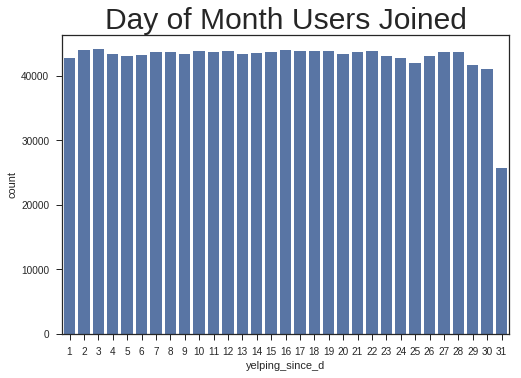

In [116]:
sns.countplot(users["yelping_since_d"], color = 'b').set_title('Day of Month Users Joined',fontsize=30)

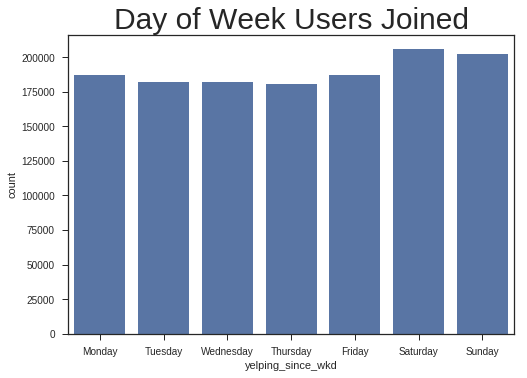

In [132]:
ax = sns.countplot(users["yelping_since_wkd"], color = 'b').set_title('Day of Week Users Joined',fontsize=30)
plt.xticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', "Sunday"));

## Understanding Friendships

In [51]:
users["friends"][0]

'0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg, HVUAmApa0fCbHHVJ0ALshw, LBOTb6bJjCdFyDLNswUGmA, cy3d0moQOsrhWo6VAyA_kA, XTDeelhFzFX0h_8YELJDIQ, _erxdUfB8yJA_MCDBAaD_w, 3wMYVoHy15nxOCLZYYIhqA, 74C8Mdn3ISlFIwNZQUPEdg, Vc980a_kTQL9tzfG1ESq_g, UPld_8xdzvYmIMA4YxtG0A, ggppqaSt-4E-Y2XUVv6mMw, vILp0ctTM3fX0ucJeBw9Hg, Gl46kwumd4_f102dxgswDw, i9CDu8j-qcUfZYl67WBwiw, 23lcgZUt6dvtMqV_AZe9KQ, zacONW61-GjaCF9h5_icgA, BclKLmGPYlMEVr3OZ_Uuzw, ol00uKESTC5PR_fETT27AA, o7e8zecvSlPNTrPi1ZQLzg, 00JBHX0npVAC-itaFOUhpQ, im3w0wt-ZeE-lDa1zSdyMg, J_hT3mbtiwHIEWjTBSJnzQ, _54jmZK9vr9CN-SUSjFbMg, 65w6GtrNNlZDowVDAYGZFQ, WJeipqBVdQmVhnYrXlLb7A, vAhyONgVtU-oIaSHRJW0IA, Soa5S7dQsSjlG3lbTVGb2A, xtVcWcIKVORcBKhmdbrFiA, 7CghpxENlXnjTGOyNtRDsg, jI5mX0tNR79J_qoFKZMPdA, MFtiq9lbm95WVg501wNsww, SCICexHST-LMCowvH9h7jQ, SD2VfVLfSkz8m18dvo0HGA, Y8TLRIPm_ecnZPItgAJ3Kg, t9bfJI2zvx-3eFrN2zvQnw, 6yUCCifCroUPfXaVo5fCAA, SGDa-z6MmLmNCamviRsdsA, aZiDtUBOMHh19IsShZvqJg, nT9_vJSUk_Tay2Yx84rzCg, M98bD_uUoC0SJ39keA4OQw, hT3kGKYFnLflIif

In [57]:
users["friend_count"] = users["friends"].apply(lambda x: len(x.split(",")) if x != 'None' else 0)

In [58]:
users["friend_count"].head()

0    79
1     0
2     0
3     0
4     0
Name: friend_count, dtype: int64

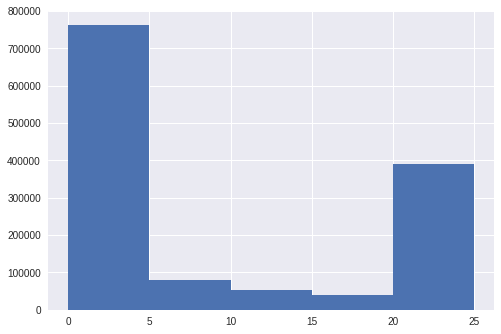

In [66]:
bins = np.arange(0,30,5)
plt.hist(np.clip(users["friend_count"], bins[0], bins[-1]), bins=bins);